# Exploratory Data Analysis

In this section, we're going to investigate some of the data we've collected and see if we can uncover some interesting trends.

Questions that we would like to address:

* What are the top 5 states with highest number of positive cases and what trends are they showing currently?
* Does a states political polarity affect the number of positive cases?
* 

## Importing Libraries and Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')

In [3]:
df = pd.read_csv('states_daily_preprocessed.csv')
df.head()

,Unnamed: 0,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,0,2020-09-24,AK,0,0,433198,0
1,1,2020-09-24,AL,1053,6296,1092953,7277
2,2,2020-09-24,AR,1086,9436,919786,10466
3,3,2020-09-24,AS,0,0,1571,0
4,4,2020-09-24,AZ,568,9983,1420417,10551


In [4]:
# Dropping Unnamed: 0
df = df.drop('Unnamed: 0', axis=1)
df.head()

,date,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
0,2020-09-24,AK,0,0,433198,0
1,2020-09-24,AL,1053,6296,1092953,7277
2,2020-09-24,AR,1086,9436,919786,10466
3,2020-09-24,AS,0,0,1571,0
4,2020-09-24,AZ,568,9983,1420417,10551


## Inspecting Data

Ok, let's double-check the data types and see if there are any missing values.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   date                      11466 non-null  object
 1   state                     11466 non-null  object
 2   positiveIncrease          11466 non-null  int64 
 3   negativeIncrease          11466 non-null  int64 
 4   total                     11466 non-null  int64 
 5   totalTestResultsIncrease  11466 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 537.6+ KB


Whoops!  Looks like I forgot to change `date` to date-time format! Let's take care of that and set it as the index.

In [6]:
# Changing to Date-time
df['date'] = pd.to_datetime(df['date'], yearfirst=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11466 entries, 0 to 11465
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      11466 non-null  datetime64[ns]
 1   state                     11466 non-null  object        
 2   positiveIncrease          11466 non-null  int64         
 3   negativeIncrease          11466 non-null  int64         
 4   total                     11466 non-null  int64         
 5   totalTestResultsIncrease  11466 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 537.6+ KB


In [7]:
# Setting the 'date' column to index for time series manipulation.
df2 = df.set_index('date')
df2.head()

,state,positiveIncrease,negativeIncrease,total,totalTestResultsIncrease
date,,,,,
2020-09-24,AK,0,0,433198,0
2020-09-24,AL,1053,6296,1092953,7277
2020-09-24,AR,1086,9436,919786,10466
2020-09-24,AS,0,0,1571,0
2020-09-24,AZ,568,9983,1420417,10551


One last correction needs to be made.  The values under `total` represent the total number of tests performed, not confirmed positive cases.  So we'll rename this column to prevent confusion

In [8]:
df2 = df2.rename(columns={'total' : 'total_tests'})
df2.head()

,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
date,,,,,
2020-09-24,AK,0,0,433198,0
2020-09-24,AL,1053,6296,1092953,7277
2020-09-24,AR,1086,9436,919786,10466
2020-09-24,AS,0,0,1571,0
2020-09-24,AZ,568,9983,1420417,10551


Now that we've fixed that.  Let's make a few initial plots of the dataframe.  It'll be very messy, but we need to see what we're working with considering that we have both repeating states and dates, and a lot of data on VERY different scales.

<AxesSubplot:xlabel='date'>

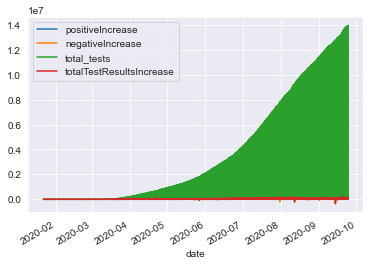

In [9]:
df2.plot()

Alright! So the `.plot()` method makes for a very confusing plot! On top of the fact that the values in `total` are on a Jovian scale compared to the other data points.  Also, even if data on the individual state level are present, they're indistinguishable.

Let's look at what happens if we focus in on only the daily increase of positive cases.

<AxesSubplot:xlabel='date'>

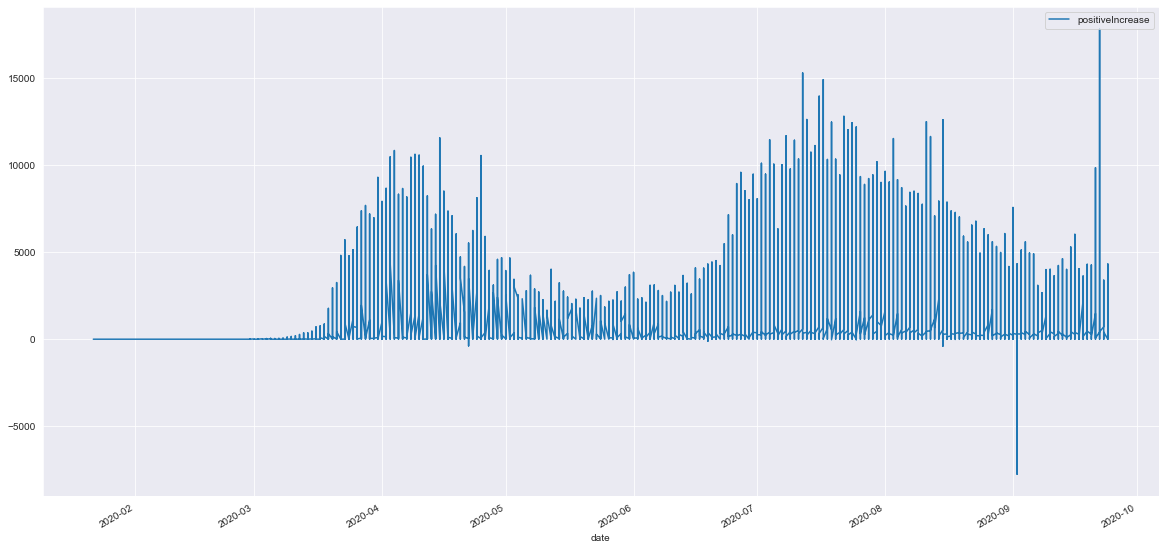

In [10]:
df2_drop = df2.drop(['total_tests', 'negativeIncrease','totalTestResultsIncrease'], 
                    axis=1)

df2_drop.plot(figsize=(20, 10))

It is certainly more clear, but there is still a problem with how we are still unable to distinguish the different cities.  I am very interested in seeing what state had the giant spike in cases in the last few days, though.  We'll put a pin in that for now, however.

For now, let's organize the data by creating different dataframes for each state and store these in a dictionary. 

# Organizing Data

In [12]:
states_complete = {}

for state in df2.state.unique():
    # Keys will be the state's acronym
    key = state 
    # Values are subsets of the dataframe relating to the respective state
    value = df2[df2['state'] == state].reset_index()
    states_complete[key] = value
    
    
states_complete['WA']

,date,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
0,2020-09-24,WA,509,1888,1743296,2397
1,2020-09-23,WA,0,0,1740899,0
2,2020-09-22,WA,645,3698,1740899,4343
3,2020-09-21,WA,349,13167,1736556,13516
4,2020-09-20,WA,597,17773,1723040,18370
...,...,...,...,...,...,...
242,2020-01-26,WA,0,0,0,0
243,2020-01-25,WA,0,0,0,0
244,2020-01-24,WA,0,0,0,0
245,2020-01-23,WA,0,0,0,0


Now that everything is inside of a dictionary, we'll make a list of the keys so that we can iterate through the dictionary more easily.

In [13]:
states_complete['AZ']

,date,state,positiveIncrease,negativeIncrease,total_tests,totalTestResultsIncrease
0,2020-09-24,AZ,568,9983,1420417,10551
1,2020-09-23,AZ,438,8774,1409866,9212
2,2020-09-22,AZ,595,9097,1400654,9692
3,2020-09-21,AZ,233,6805,1390962,7038
4,2020-09-20,AZ,467,10298,1383924,10765
...,...,...,...,...,...,...
200,2020-03-08,AZ,0,0,56,0
201,2020-03-07,AZ,2,11,56,13
202,2020-03-06,AZ,1,5,51,6
203,2020-03-05,AZ,0,1,36,1


In [14]:
# Creating list of keys for performing iterations through dicitonary
keys = []

for key in df2.state.unique():
    keys.append(key)

keys[0:5]

['AK', 'AL', 'AR', 'AS', 'AZ']

# States with the Most COVID-19 Cases
Now that we've organized everything, let's find out which states have the most COVID cases.

In [29]:
# Creating dataframe for total number of positive cases per state

state_total_cases = []

for key in states_complete:
    state_total_cases.append(states_complete[key]['positiveIncrease'].sum())
    
state_totals = {}
for i in range(0, 56):
    key = keys[i]
    value = state_total_cases[i]
    state_totals[key] = value

highest_cases = pd.DataFrame.from_dict(state_totals, orient='index')
highest_cases = highest_cases.rename(columns={0:'total_positive'})
highest_cases.head(10)

,total_positive
AK,7941
AL,148206
AR,79049
AS,0
AZ,215850
CA,790587
CO,66667
CT,56472
DC,15106
DE,19947


Now that we've compiled all of this into a new dataframe, let's go ahead and plot this information.

## Total Cases by State

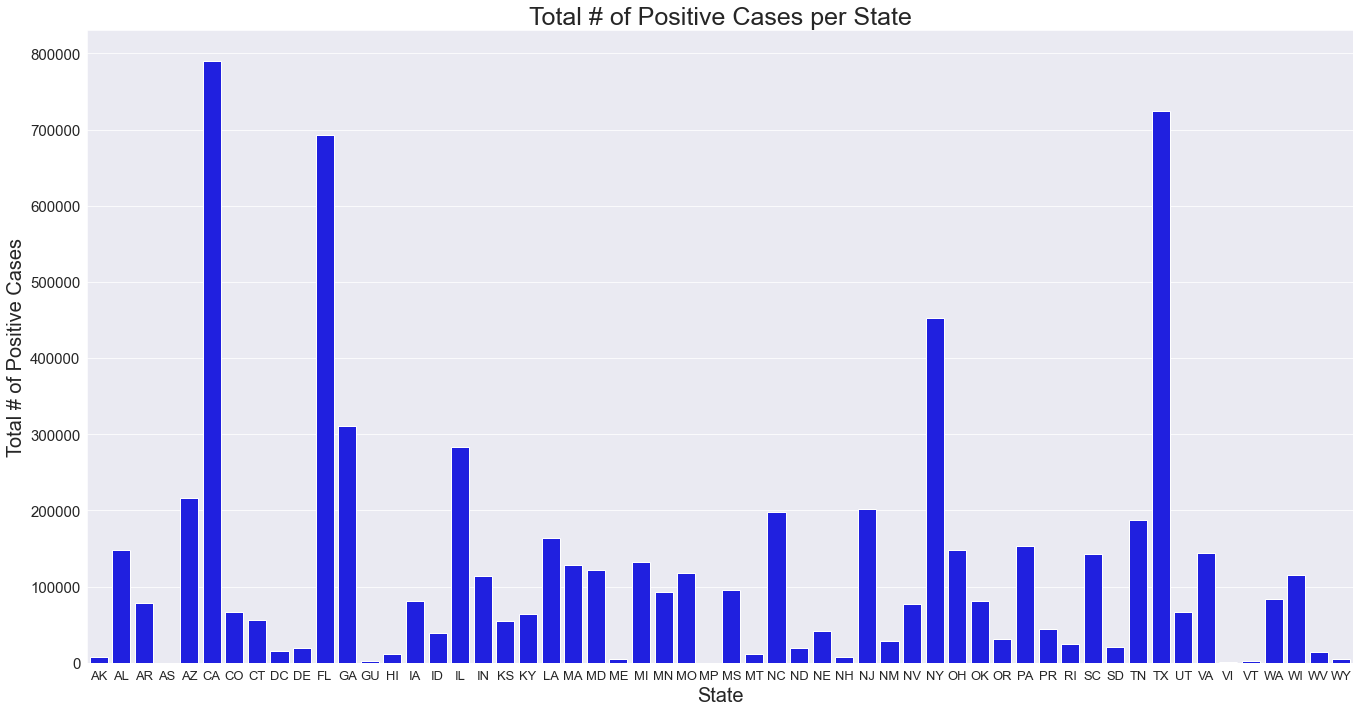

In [33]:
fig = plt.figure(figsize=(19, 10))

sns.barplot(highest_cases.index, 
            highest_cases['total_positive'], 
            color='blue')

plt.xlabel('State', fontsize=20)
plt.xticks(fontsize=13)

plt.ylabel('Total # of Positive Cases', fontsize=20)
plt.yticks(fontsize=15)

plt.title('Total # of Positive Cases per State', fontsize=25)

plt.tight_layout()
plt.show();


Currently, our top 5 states are California, Texas, Florida, New York, and Georgia.  Now, I happen to know that, while New York was hit very hard at first, they made a great recovery.  Let's see if the same can be said of the other states.

### Current Trends

Since we're going to be doing this a few times, let's make a function that takes in a key and a column for a dataframe inside of our dictionary, and returns a dataframe that is formatted for time-series analysis.

In [56]:
def dict_to_timeseries(key, col):
    '''
    Input a key and a column name. 
    
    The function will take those to create a subset of the data for that key 
    consisting of the Date as an index, and 
    the specified column. 
    
    Output: Dataframe 
    '''
    # Creating an empty dictionary to store values
    temp_dict = {}
    
    # Retrieve information 
    for i in range(len(states_complete[key])):
        
        # Keys of dictionary will be the dates 
        k = states_complete[key]['date'][i]
        
        # Retrieve values in the specified column
        val = states_complete[key][col][i]
        
        # Storing values in dictionary
        temp_dict[k] = val    
    
    # Create dataframe from the dictionary with dates as the index
    ts_df = pd.DataFrame.from_dict(temp_dict, orient='index')
    
    # Rename the column to the name specified
    ts_df = ts_df.rename(columns={0 : key + '_' + col})
    
    return ts_df

# Test
CA = dict_to_timeseries('CA', 'positiveIncrease')
print(f"This is a {type(cali)} object")
CA.head()

This is a <class 'pandas.core.frame.DataFrame'> object


,CA_positiveIncrease
2020-09-24,3170
2020-09-23,3146
2020-09-22,2630
2020-09-21,3294
2020-09-20,4265


Now that we've got our function (and it works), it's time to go ahead make dataframes for our remaining 4 states.

In [57]:
TX = dict_to_timeseries('TX', 'positiveIncrease')
GA = dict_to_timeseries('GA', 'positiveIncrease')
NY = dict_to_timeseries('NY', 'positiveIncrease')
FL = dict_to_timeseries('FL', 'positiveIncrease')


In [63]:
top_5 = pd.concat([CA, TX, GA, NY, FL], axis=1, join='outer')
top_5

,CA_positiveIncrease,TX_positiveIncrease,GA_positiveIncrease,NY_positiveIncrease,FL_positiveIncrease
2020-09-24,3170,4320,1368,955,2541
2020-09-23,3146,3392,1457,665,2590
2020-09-22,2630,17820,882,754,2470
2020-09-21,3294,9853,1184,573,1685
2020-09-20,4265,2466,1134,862,2521
...,...,...,...,...,...
2020-03-08,19,0,1,29,3
2020-03-07,9,3,4,43,5
2020-03-06,7,4,0,11,0
2020-03-05,0,0,0,16,7


<AxesSubplot:>

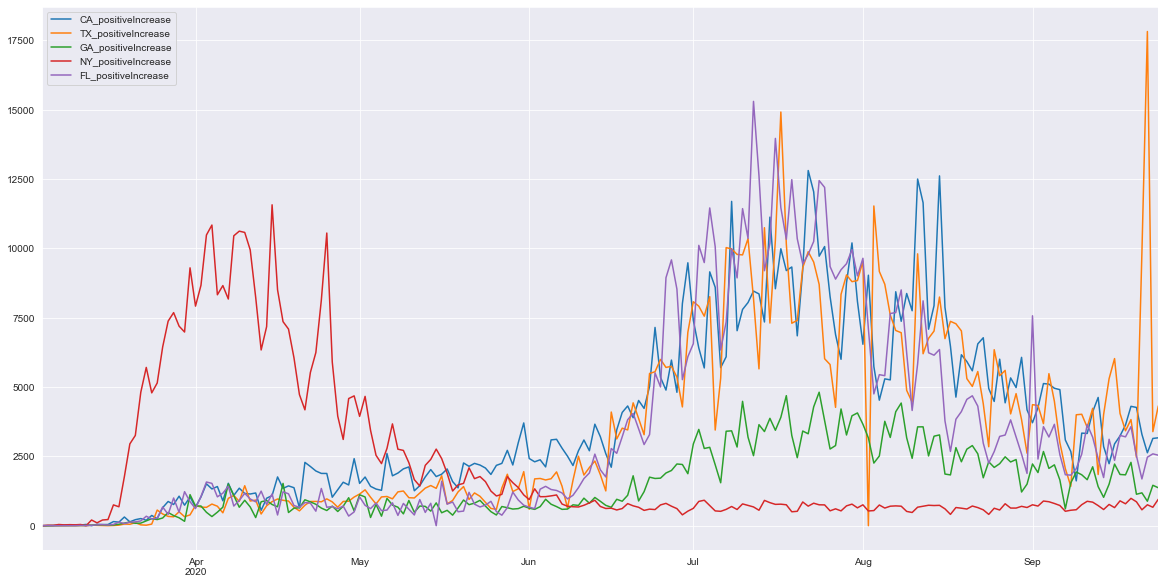

In [67]:
top_5.plot(figsize=(20, 10), legend=True)

This is a little messy, but I think it's important to see them all on a single graph so that we have more context when we look at the subplots.  Let's do that next!

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>], dtype=object)

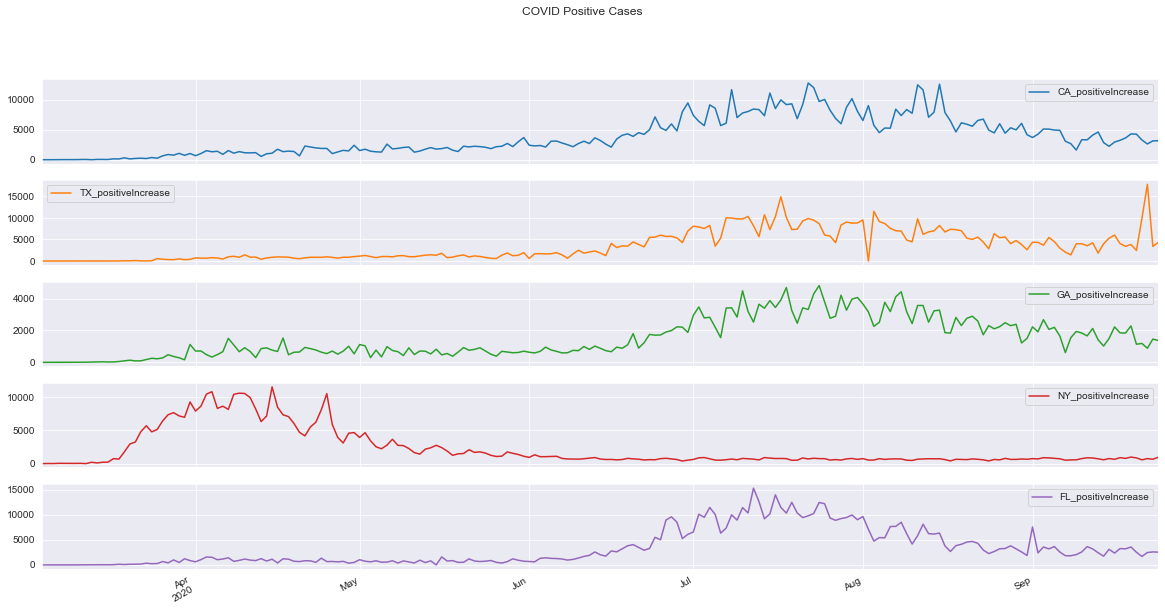

In [69]:
top_5.plot(figsize=(20, 10), subplots=True, legend=True, 
           title='COVID Positive Cases', )

As we mentioned earlier, New York was hit hard at the beginning, but has stabilized since then.  The other states, on the other hand, seem to follow a trend, with exponential increase over the summer months and tapering down (with the exception of Texas' massive spike in cases) are tapering down and converging.

In [36]:
temp_dict = {}
for i in range(len(states_complete['CA'])):
    k = states_complete['CA']['date'][i]
    val = states_complete['CA']['positiveIncrease'][i]
    temp_dict[k] = val
time_df = pd.DataFrame.from_dict(temp_dict, orient='index')
time_df.head()

,0
2020-09-24,3170
2020-09-23,3146
2020-09-22,2630
2020-09-21,3294
2020-09-20,4265


In [ ]:
# Keys for the states
top_5 = ['CA', 'GA', 'NY', 'FL', 'TX']

def


for key in top_5:
    state_total_cases.append(states_complete[key]['positiveIncrease'].sum())
    
state_totals = {}
for i in range(0, 56):
    key = keys[i]
    value = state_total_cases[i]
    state_totals[key] = value

highest_cases = pd.DataFrame.from_dict(state_totals, orient='index')
highest_cases = highest_cases.rename(columns={0:'total_positive'})
highest_cases.head(10)

In [65]:
# for creating dataframes
state_totals = {}
for i in range(0, 56):
    key = state_list[i]
    value = state_total_max[i]
    state_totals[key] = value

highest_cases = pd.DataFrame.from_dict(state_totals, orient='index')
highest_cases.head()

,0
AK,433198
AL,1092953
AR,919786
AS,1571
AZ,1420417


In [13]:
df_jhu = pd.read_csv('jhu_confirmed_preprocessed')
df_jhu = df_jhu.drop('Unnamed: 0', axis=1)
df_jhu.head()

,Admin2,Province_State,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,...,9/19/20,9/20/20,9/21/20,9/22/20,9/23/20,9/24/20,9/25/20,9/26/20,9/27/20,9/28/20
0,Autauga,Alabama,0,0,0,0,0,0,0,0,...,1673,1690,1691,1714,1715,1738,1757,1764,1773,1785
1,Baldwin,Alabama,0,0,0,0,0,0,0,0,...,5047,5061,5087,5124,5141,5165,5456,5477,5526,5588
2,Barbour,Alabama,0,0,0,0,0,0,0,0,...,830,835,838,848,851,857,873,882,885,886
3,Bibb,Alabama,0,0,0,0,0,0,0,0,...,628,632,636,635,638,642,652,654,656,657
4,Blount,Alabama,0,0,0,0,0,0,0,0,...,1542,1551,1560,1573,1580,1594,1608,1611,1617,1618


In [14]:
# checking number of states and territories
len(df_jhu.Province_State.unique())

58

In [15]:
bama = df[df['Province_State'] == 'Alabama']

bama.info()

KeyError: 'Province_State'

In [ ]:
fig = plt.figure(figsize=(40, 20))
bama.plot(figsize=(40, 20))
plt.xticks(ticks=np.arange(0, 69), labels=bama['Admin2'], rotation=90)
plt.show();

In [ ]:
jeff = bama[bama['Admin2'] == 'Jefferson']
jeff

In [ ]:
# creating a dataframe that is based on the 
swapped = df_jhu.swapaxes('index', 'columns')
swapped

In [ ]:
df_jhu.iloc[:,1]

In [ ]:
columns_list = []
for val in range(len(swapped.iloc[1])):
    columns_list.append(swapped.iloc[1][val])
columns_list

In [ ]:
# rename columns

for i in range(len(swapped.columns)):
    swapped = swapped.rename(columns={swapped.columns[i] : columns_list[i]})
    
swapped.head()
    

In [ ]:
swapped['Province_State']

In [ ]:
swappedunstack= swapped.unstack()
swapped_col = swapped_col.reset_index()
swapped_col.unstack(level=-1)
swapped_final = pd.merge(swapped, swapped_col, left_index=True)
swapped_final